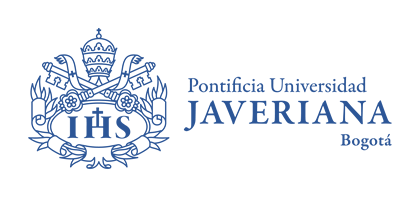

# **Entrega 1 - Proyecto Imágenes tumores cerebrales**

### **Realizado por:**

- Carlos Másmela
- Yudy Pedraza

### **Resumen:**

El siguiente Notebook tiene como propósito mostrar el preprocesamiento realizado a las imágenes de tumores cerebrales dispuestas para el desarrollo de este proyecto.

# **Librerías**

In [ ]:
from PIL import Image
import PIL
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from skimage.io import imread, imshow
from skimage.filters import prewitt_h, prewitt_v
import matplotlib.pyplot as plt
import cv2
import numpy as np
import plotly.express as px
import plotly.subplots
import plotly.graph_objs as go
import scipy.ndimage
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Lectura datos**

In [ ]:
!git clone "https://github.com/candemas97/tumores_cerebrales"

Cloning into 'tumores_cerebrales'...
remote: Enumerating objects: 6739, done.
remote: Total 6739 (delta 0), reused 0 (delta 0), pack-reused 6739
Receiving objects: 100% (6739/6739), 140.80 MiB | 23.36 MiB/s, done.
Updating files: 100% (7023/7023), done.


In [ ]:
ruta_local_training_glioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma'
ruta_local_training_meningioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/meningioma'
ruta_local_training_pituitary = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/pituitary'
ruta_local_training_notumor = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/notumor'

In [ ]:
def leer_archivos_en_ruta(ruta: str) -> list:
  """
  Función encargada de leer todos los archivos que contiene cada carpeta
  """
  archivos = os.listdir(ruta)
  nombre_seccion = ruta.split("/")[-1]
  print(f"Cantidad de archivos - {nombre_seccion}: {len(archivos)}")
  print(f"{archivos[:5]}\n")
  return archivos

In [ ]:
#Leer y revisar archivos
archivos_glioma = leer_archivos_en_ruta(ruta_local_training_glioma)
archivos_meningioma = leer_archivos_en_ruta(ruta_local_training_meningioma)
archivos_pituitary = leer_archivos_en_ruta(ruta_local_training_pituitary)
archivos_notumor = leer_archivos_en_ruta(ruta_local_training_notumor)

Cantidad de archivos - glioma: 1321
['Tr-gl_0314.jpg', 'Tr-gl_1297.jpg', 'Tr-gl_0223.jpg', 'Tr-gl_0375.jpg', 'Tr-gl_1193.jpg']

Cantidad de archivos - meningioma: 1339
['Tr-me_0197.jpg', 'Tr-me_0675.jpg', 'Tr-me_1312.jpg', 'Tr-me_0782.jpg', 'Tr-me_0359.jpg']

Cantidad de archivos - pituitary: 1457
['Tr-pi_1258.jpg', 'Tr-pi_0407.jpg', 'Tr-pi_0266.jpg', 'Tr-pi_0011.jpg', 'Tr-pi_1327.jpg']

Cantidad de archivos - notumor: 1595
['Tr-no_0428.jpg', 'Tr-no_1188.jpg', 'Tr-no_1145.jpg', 'Tr-no_1222.jpg', 'Tr-no_0399.jpg']



In [ ]:
def ver_tamano_cada_imagen(ruta: str, imprimir_todo: bool = False) -> None:
  arc = os.listdir(ruta)
  nombre_seccion = ruta.split("/")[-1].upper()

  # Crear una lista para almacenar los datos de la tabla
  tabla = {'Nombre Archivo': [],
          'Tamano': []}

  # Recorrer cada archivo en el directorio
  for archivo in arc:
      if archivo.endswith(('.jpg')):  # Puedes ajustar las extensiones compatibles
          ruta_completa = os.path.join(ruta, archivo)

          # Abrir la imagen
          imagen = Image.open(ruta_completa)

          # Obtener el tamaño de la imagen
          ancho, alto = imagen.size

          # Agregar los datos a la tabla como una tupla
          tabla['Nombre Archivo'].append(archivo)
          tabla['Tamano'].append(f"{ancho}x{alto} píxeles")

  #Ver cantidad de imágenes por tamaño
  tabla_agrupada = pd.DataFrame(tabla).groupby(['Tamano']).count().reset_index()
  cantidad_tamanos = len(tabla_agrupada)
  tabla_agrupada = tabla_agrupada.to_dict()

  #Imprimir títulos
  print(f"\t\t   {nombre_seccion}\n")
  print(f"Cantidad de diversos tamaños de imagen: {cantidad_tamanos}\n")
  print(f"\t\t   TABLA AGRUPADA\n")
  print("Tamaño Imagen\t\t\tCantidad")
  print("--------------------\t\t----------------")
  # Imprimir Tabla agrupada

  for fila in range(cantidad_tamanos):
    print(f"{tabla_agrupada['Tamano'][fila]}\t\t\t{tabla_agrupada['Nombre Archivo'][fila]}")
  print("-"*50, "\n")

  if imprimir_todo == True:
    # Imprimir la tabla total
    print(f"\t\t   TABLA AL DETALLE\n")
    print("Nombre de la imagen\t\t\tTamaño")
    print("--------------------\t\t\t----------------")
    for fila in range(len(tabla['Nombre Archivo'])):
        #if tabla['Tamano'][fila] == "512x512 píxeles":
          print(f"Fila#{fila}: {tabla['Nombre Archivo'][fila]}\t\t\t{tabla['Tamano'][fila]}")
    print("-"*50, "\n")

In [ ]:
ver_tamano_cada_imagen(ruta_local_training_glioma, True)

		   GLIOMA

Cantidad de diversos tamaños de imagen: 1

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
512x512 píxeles			1321
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-gl_0314.jpg			512x512 píxeles
Fila#1: Tr-gl_1297.jpg			512x512 píxeles
Fila#2: Tr-gl_0223.jpg			512x512 píxeles
Fila#3: Tr-gl_0375.jpg			512x512 píxeles
Fila#4: Tr-gl_1193.jpg			512x512 píxeles
Fila#5: Tr-gl_0166.jpg			512x512 píxeles
Fila#6: Tr-gl_0580.jpg			512x512 píxeles
Fila#7: Tr-gl_0183.jpg			512x512 píxeles
Fila#8: Tr-gl_0292.jpg			512x512 píxeles
Fila#9: Tr-gl_0737.jpg			512x512 píxeles
Fila#10: Tr-gl_1062.jpg			512x512 píxeles
Fila#11: Tr-gl_1097.jpg			512x512 píxeles
Fila#12: Tr-gl_1084.jpg			512x512 píxeles
Fila#13: Tr-gl_0727.jpg			512x512 píxeles
Fila#14: Tr-glTr_0005.jpg			512x512 píxeles
Fila#15: Tr-gl_0929.jpg			512x512 píxeles
Fila#16: Tr-gl_0705.jpg			5

In [ ]:
ver_tamano_cada_imagen(ruta_local_training_meningioma)

		   MENINGIOMA

Cantidad de diversos tamaños de imagen: 123

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
1149x1019 píxeles			1
1275x1427 píxeles			1
180x218 píxeles			1
200x223 píxeles			2
200x235 píxeles			1
200x236 píxeles			1
200x252 píxeles			1
201x207 píxeles			1
201x251 píxeles			2
202x223 píxeles			1
204x249 píxeles			1
205x251 píxeles			1
206x245 píxeles			1
206x249 píxeles			1
208x243 píxeles			1
209x225 píxeles			1
209x241 píxeles			1
210x240 píxeles			1
211x239 píxeles			1
212x237 píxeles			2
212x238 píxeles			1
213x236 píxeles			1
213x237 píxeles			2
214x216 píxeles			1
214x235 píxeles			1
215x220 píxeles			1
215x234 píxeles			1
216x216 píxeles			1
216x234 píxeles			1
217x232 píxeles			1
219x234 píxeles			1
221x228 píxeles			1
224x216 píxeles			1
224x219 píxeles			1
225x225 píxeles			8
226x212 píxeles			1
226x214 píxeles			1
226x223 píxeles			1
229x223 píxeles			1
230x241 píxeles			1
232x261 píxeles			1
234x216 píxeles			1
238x212 p

In [ ]:
ver_tamano_cada_imagen(ruta_local_training_pituitary, True)

		   PITUITARY

Cantidad de diversos tamaños de imagen: 16

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
1280x1280 píxeles			1
1365x1365 píxeles			1
201x210 píxeles			1
202x202 píxeles			1
256x256 píxeles			24
360x378 píxeles			1
400x400 píxeles			1
442x442 píxeles			1
470x432 píxeles			1
474x474 píxeles			2
502x502 píxeles			1
512x512 píxeles			1418
685x681 píxeles			1
721x903 píxeles			1
900x741 píxeles			1
940x900 píxeles			1
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-pi_1258.jpg			512x512 píxeles
Fila#1: Tr-pi_0407.jpg			512x512 píxeles
Fila#2: Tr-pi_0266.jpg			512x512 píxeles
Fila#3: Tr-pi_0011.jpg			512x512 píxeles
Fila#4: Tr-pi_1327.jpg			512x512 píxeles
Fila#5: Tr-pi_0384.jpg			512x512 píxeles
Fila#6: Tr-pi_1156.jpg			512x512 píxeles
Fila#7: Tr-pi_0169.jpg			512x512 píxeles
Fila#8: Tr-pi_0145.jpg			512x512 píxeles
Fila#9: Tr-pi

In [ ]:
ver_tamano_cada_imagen(ruta_local_training_notumor, True)

		   NOTUMOR

Cantidad de diversos tamaños de imagen: 254

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
1000x583 píxeles			2
1000x714 píxeles			1
1024x1024 píxeles			5
1024x830 píxeles			1
1280x720 píxeles			1
1375x1446 píxeles			1
150x198 píxeles			36
173x201 píxeles			30
177x197 píxeles			7
1920x1080 píxeles			1
192x192 píxeles			27
194x259 píxeles			10
196x257 píxeles			11
200x200 píxeles			1
200x210 píxeles			1
200x243 píxeles			2
200x248 píxeles			2
200x252 píxeles			31
201x244 píxeles			1
201x249 píxeles			1
201x250 píxeles			26
201x251 píxeles			41
202x250 píxeles			1
203x243 píxeles			2
203x248 píxeles			1
204x247 píxeles			1
205x214 píxeles			2
205x249 píxeles			2
206x244 píxeles			28
207x207 píxeles			1
207x225 píxeles			2
207x243 píxeles			14
208x217 píxeles			1
208x225 píxeles			2
208x242 píxeles			18
208x248 píxeles			4
208x278 píxeles			2
209x234 píxeles			1
209x242 píxeles			2
210x201 píxeles			1
210x213 píxeles			2
210x234 píxeles

In [ ]:
ejemplo_glioma = ruta_local_training_glioma +"/"+ archivos_glioma[2]
ejemplo_meningioma = ruta_local_training_meningioma +"/"+ archivos_meningioma[232]
ejemplo_pituitary = ruta_local_training_pituitary + "/" + archivos_pituitary[827]
ejemplo_notumor = ruta_local_training_notumor + "/" + archivos_notumor[144] #39 #144


Ancho de la imagen - glioma: 512 píxeles
Alto de la imagen - glioma: 512 píxeles
Ancho de la imagen - meningioma: 512 píxeles
Alto de la imagen - meningioma: 512 píxeles
Ancho de la imagen - pituitary: 256 píxeles
Alto de la imagen - pituitary: 256 píxeles
Ancho de la imagen - notumor: 235 píxeles
Alto de la imagen - notumor: 227 píxeles


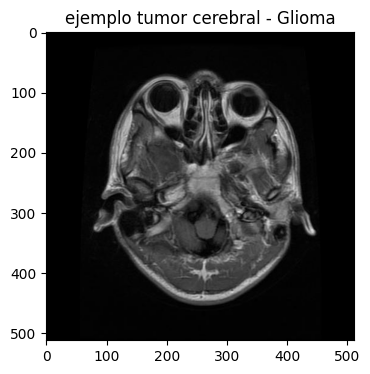

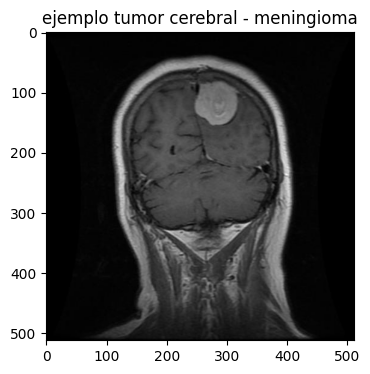

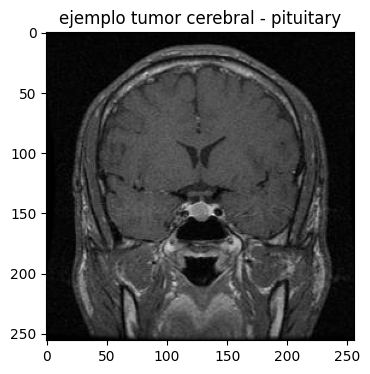

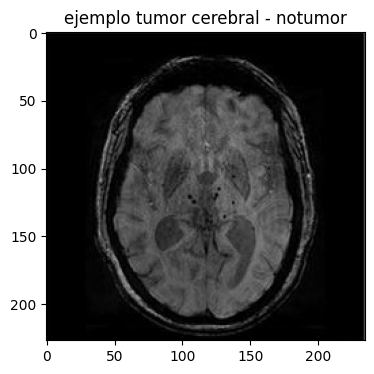

In [ ]:
#Cargar imagen
#plt.figure(figsize=(20, 10))
imagen_glioma = cv2.imread(ejemplo_glioma)
imagen_meningioma = cv2.imread(ejemplo_meningioma)
imagen_pituitary = cv2.imread(ejemplo_pituitary)
imagen_notumor = cv2.imread(ejemplo_notumor)

# Mostrar imagen
#plt.subplot(1, 2, 1)
plt.figure(figsize=(8, 4))
plt.imshow(imagen_glioma)
plt.title('ejemplo tumor cerebral - Glioma')
alto, ancho = imagen_glioma.shape[:2]
print(f"Ancho de la imagen - glioma: {ancho} píxeles")
print(f"Alto de la imagen - glioma: {alto} píxeles")

##plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 4))
plt.imshow(imagen_meningioma)
plt.title('ejemplo tumor cerebral - meningioma')
alto, ancho = imagen_meningioma.shape[:2]
print(f"Ancho de la imagen - meningioma: {ancho} píxeles")
print(f"Alto de la imagen - meningioma: {alto} píxeles")

plt.figure(figsize=(8, 4))
plt.imshow(imagen_pituitary)
plt.title('ejemplo tumor cerebral - pituitary')
alto, ancho = imagen_pituitary.shape[:2]
print(f"Ancho de la imagen - pituitary: {ancho} píxeles")
print(f"Alto de la imagen - pituitary: {alto} píxeles")

plt.figure(figsize=(8, 4))
plt.imshow(imagen_notumor)
plt.title('ejemplo tumor cerebral - notumor')
alto, ancho = imagen_notumor.shape[:2]
print(f"Ancho de la imagen - notumor: {ancho} píxeles")
print(f"Alto de la imagen - notumor: {alto} píxeles")

#plt.tight_layout()
#plt.show()

# **Generar Label de Imagenes**

In [ ]:
ruta_local_train = []
#Train
ruta_local_train.append('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma')
ruta_local_train.append('/content/tumores_cerebrales/Imágenes Cerebrales/Training/meningioma')
ruta_local_train.append('/content/tumores_cerebrales/Imágenes Cerebrales/Training/pituitary')
ruta_local_train.append('/content/tumores_cerebrales/Imágenes Cerebrales/Training/notumor')
#Test
ruta_local_test = []
ruta_local_test.append('/content/tumores_cerebrales/Imágenes Cerebrales/Testing/glioma')
ruta_local_test.append('/content/tumores_cerebrales/Imágenes Cerebrales/Testing/meningioma')
ruta_local_test.append('/content/tumores_cerebrales/Imágenes Cerebrales/Testing/pituitary')
ruta_local_test.append('/content/tumores_cerebrales/Imágenes Cerebrales/Testing/notumor')

In [ ]:
def crear_label_imagenes(ruta: list[str]) -> pd.DataFrame:
  """
  Generar label para etiquetar los tipos de cancer cerebrales
  """

  diccionario = {'Imagen': [], 'Categora': []} #Generar diccionario para guardar informacion
  for carpeta in ruta:
    partes = carpeta.split("/")   #Separa la data por /
    label = partes[-1]   # Obtiene el label (ultimo elemento de arreglo)
    for imagen in os.listdir(carpeta):
      diccionario['Categora'].append(label) #agregar al diccionario
      diccionario['Imagen'].append(imagen) #agregar al diccionario

  return pd.DataFrame(diccionario)

In [ ]:
train_label = crear_label_imagenes(ruta_local_train)
test_label = crear_label_imagenes(ruta_local_test)

In [ ]:
train_label.head()

,Imagen,Categora
0,Tr-gl_0314.jpg,glioma
1,Tr-gl_1297.jpg,glioma
2,Tr-gl_0223.jpg,glioma
3,Tr-gl_0375.jpg,glioma
4,Tr-gl_1193.jpg,glioma


# **Análisis de datos**

In [ ]:
def ver_tamano(rutarz: str) -> pd.DataFrame:
  arc = os.listdir(rutarz)
  nombre_seccion = rutarz.split("/")[-1].upper()

  # Crear una lista para almacenar los datos de la tabla
  tabla = {'Nombre Archivo': [],
          'Tamano': []}

  # Recorrer cada archivo en el directorio
  for archivo in arc:
      if archivo.endswith(('.jpg')):  # Puedes ajustar las extensiones compatibles
          ruta_completa = os.path.join(rutarz, archivo)

          # Abrir la imagen
          imagen = Image.open(ruta_completa)

          # Obtener el tamaño de la imagen
          ancho, alto = imagen.size

          # Agregar los datos a la tabla como una tupla
          tabla['Nombre Archivo'].append(archivo)
          tabla['Tamano'].append(f"{ancho}x{alto} píxeles")

  #Ver cantidad de imágenes por tamaño
  tabla_agrupada = pd.DataFrame(tabla).groupby(['Tamano']).count().reset_index()

  return tabla_agrupada

In [ ]:
ruta_local_training_glioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma'
ruta_local_training_meningioma = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/meningioma'
ruta_local_training_pituitary = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/pituitary'
ruta_local_training_notumor = '/content/tumores_cerebrales/Imágenes Cerebrales/Training/notumor'

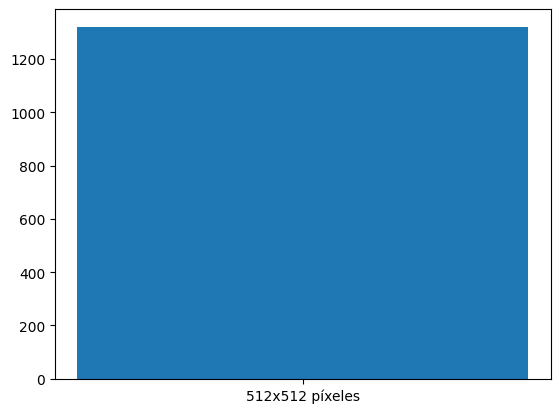

In [ ]:
glioma = ver_tamano(ruta_local_training_glioma)
glioma

plt.bar(glioma['Tamano'], glioma['Nombre Archivo'])
plt.show()

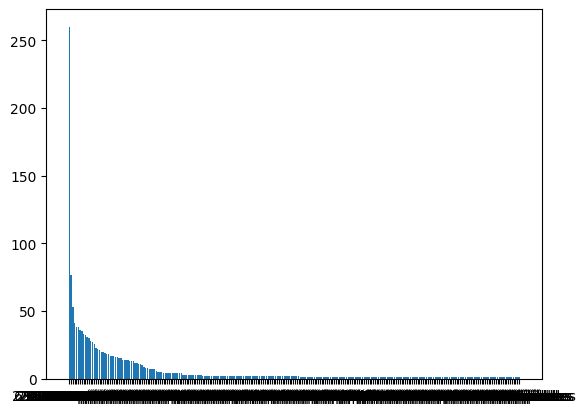

In [ ]:
notumor = ver_tamano(ruta_local_training_notumor).sort_values(by=["Nombre Archivo"], ascending=False)

plt.bar(notumor['Tamano'], notumor['Nombre Archivo'])
plt.show()

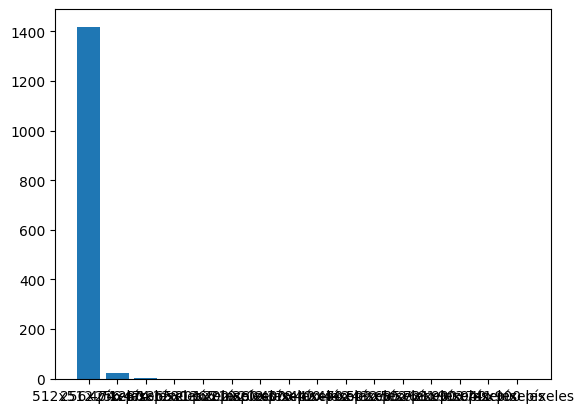

In [ ]:
pituitary = ver_tamano(ruta_local_training_pituitary).sort_values(by=["Nombre Archivo"], ascending=False)

plt.bar(pituitary['Tamano'], pituitary['Nombre Archivo'])
plt.show()

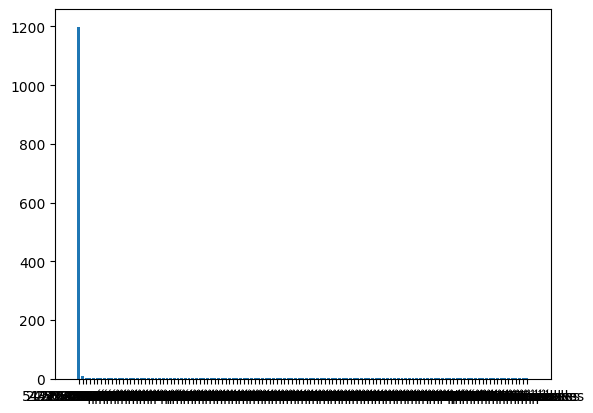

In [ ]:
meningioma = ver_tamano(ruta_local_training_meningioma).sort_values(by=["Nombre Archivo"], ascending=False)

plt.bar(meningioma['Tamano'], meningioma['Nombre Archivo'])
plt.show()

# **Transformaciones**

## ***Resize***

In [ ]:
nombre_directorio = "tumores_cerebrales_resized"
os.mkdir(nombre_directorio)
os.makedirs(os.path.join(nombre_directorio, "Training"))
os.makedirs(os.path.join(nombre_directorio, "Testing"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "notumor"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "notumor"))

In [ ]:
Resized_training_glioma = '/content/tumores_cerebrales_resized/Training/glioma'
Resized_training_meningioma = '/content/tumores_cerebrales_resized/Training/meningioma'
Resized_training_pituitary = '/content/tumores_cerebrales_resized/Training/pituitary'
Resized_training_notumor = '/content/tumores_cerebrales_resized/Training/notumor'

In [ ]:
input_directory_glioma = ruta_local_training_glioma
output_directory_glioma = Resized_training_glioma

input_directory_meningioma = ruta_local_training_glioma
output_directory_meningioma = Resized_training_meningioma

input_directory_pituitary = ruta_local_training_pituitary
output_directory_pituitary = Resized_training_pituitary

input_directory_notumor = ruta_local_training_notumor
output_directory_notumor = Resized_training_notumor

In [ ]:
new_width = 512
new_height = 512

In [ ]:
os.makedirs(output_directory_glioma, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_glioma):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_glioma, filename)
        output_path = os.path.join(output_directory_glioma, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [ ]:
#glioma
os.makedirs(output_directory_glioma, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_glioma):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_glioma, filename)
        output_path = os.path.join(output_directory_glioma, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [ ]:
#meningioma
os.makedirs(output_directory_meningioma, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_meningioma):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_meningioma, filename)
        output_path = os.path.join(output_directory_meningioma, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [ ]:
#pituitary
os.makedirs(output_directory_pituitary, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_pituitary):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_pituitary, filename)
        output_path = os.path.join(output_directory_pituitary, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [ ]:
#notumor
os.makedirs(output_directory_notumor, exist_ok=True)

# Recorre todas las imágenes en el directorio de entrada
for filename in os.listdir(input_directory_notumor):
    if filename.endswith(('.jpg')):
        input_path = os.path.join(input_directory_notumor, filename)
        output_path = os.path.join(output_directory_notumor, filename)

        # Lee la imagen
        image = cv2.imread(input_path)

        # Redimensiona la imagen
        resized_image = cv2.resize(image, (new_width, new_height))

        # Guarda la imagen redimensionada
        cv2.imwrite(output_path, resized_image)

In [ ]:
def leer_archivos_en_ruta_resized(rutarz: str) -> list:
  """
  Función encargada de leer todos los archivos que contiene cada carpeta
  """
  archivosrz = os.listdir(rutarz)
  nombre_seccion = rutarz.split("/")[-1]
  print(f"Cantidad de archivos - {nombre_seccion}: {len(archivosrz)}")
  print(f"{archivosrz[:5]}\n")
  return archivosrz

In [ ]:
#Leer y revisar archivos
archivos_gliomarz = leer_archivos_en_ruta_resized(Resized_training_glioma)
archivos_meningiomarz = leer_archivos_en_ruta_resized(Resized_training_meningioma)
archivos_pituitaryrz = leer_archivos_en_ruta_resized(Resized_training_pituitary)
archivos_notumorrz = leer_archivos_en_ruta_resized(Resized_training_notumor)

Cantidad de archivos - glioma: 1321
['Tr-gl_0314.jpg', 'Tr-gl_1297.jpg', 'Tr-gl_0223.jpg', 'Tr-gl_0375.jpg', 'Tr-gl_1193.jpg']

Cantidad de archivos - meningioma: 1321
['Tr-gl_0314.jpg', 'Tr-gl_1297.jpg', 'Tr-gl_0223.jpg', 'Tr-gl_0375.jpg', 'Tr-gl_1193.jpg']

Cantidad de archivos - pituitary: 1457
['Tr-pi_1258.jpg', 'Tr-pi_0407.jpg', 'Tr-pi_0266.jpg', 'Tr-pi_0011.jpg', 'Tr-pi_1327.jpg']

Cantidad de archivos - notumor: 1595
['Tr-no_0428.jpg', 'Tr-no_1188.jpg', 'Tr-no_1145.jpg', 'Tr-no_1222.jpg', 'Tr-no_0399.jpg']



In [ ]:
def ver_tamano_cada_imagenrz(rutarz: str, imprimir_todo: bool = False) -> None:
  arc = os.listdir(rutarz)
  nombre_seccion = rutarz.split("/")[-1].upper()

  # Crear una lista para almacenar los datos de la tabla
  tabla = {'Nombre Archivo': [],
          'Tamano': []}

  # Recorrer cada archivo en el directorio
  for archivo in arc:
      if archivo.endswith(('.jpg')):  # Puedes ajustar las extensiones compatibles
          ruta_completa = os.path.join(rutarz, archivo)

          # Abrir la imagen
          imagen = Image.open(ruta_completa)

          # Obtener el tamaño de la imagen
          ancho, alto = imagen.size

          # Agregar los datos a la tabla como una tupla
          tabla['Nombre Archivo'].append(archivo)
          tabla['Tamano'].append(f"{ancho}x{alto} píxeles")

  #Ver cantidad de imágenes por tamaño
  tabla_agrupada = pd.DataFrame(tabla).groupby(['Tamano']).count().reset_index()
  cantidad_tamanos = len(tabla_agrupada)
  tabla_agrupada = tabla_agrupada.to_dict()

  #Imprimir títulos
  print(f"\t\t   {nombre_seccion}\n")
  print(f"Cantidad de diversos tamaños de imagen: {cantidad_tamanos}\n")
  print(f"\t\t   TABLA AGRUPADA\n")
  print("Tamaño Imagen\t\t\tCantidad")
  print("--------------------\t\t----------------")
  # Imprimir Tabla agrupada

  for fila in range(cantidad_tamanos):
    print(f"{tabla_agrupada['Tamano'][fila]}\t\t\t{tabla_agrupada['Nombre Archivo'][fila]}")
  print("-"*50, "\n")

  if imprimir_todo == True:
    # Imprimir la tabla total
    print(f"\t\t   TABLA AL DETALLE\n")
    print("Nombre de la imagen\t\t\tTamaño")
    print("--------------------\t\t\t----------------")
    for fila in range(len(tabla['Nombre Archivo'])):
        #if tabla['Tamano'][fila] == "512x512 píxeles":
          print(f"Fila#{fila}: {tabla['Nombre Archivo'][fila]}\t\t\t{tabla['Tamano'][fila]}")
    print("-"*50, "\n")

In [ ]:
#Glioma
ver_tamano_cada_imagen(Resized_training_glioma, True)

		   GLIOMA

Cantidad de diversos tamaños de imagen: 1

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
512x512 píxeles			1321
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-gl_0314.jpg			512x512 píxeles
Fila#1: Tr-gl_1297.jpg			512x512 píxeles
Fila#2: Tr-gl_0223.jpg			512x512 píxeles
Fila#3: Tr-gl_0375.jpg			512x512 píxeles
Fila#4: Tr-gl_1193.jpg			512x512 píxeles
Fila#5: Tr-gl_0166.jpg			512x512 píxeles
Fila#6: Tr-gl_0580.jpg			512x512 píxeles
Fila#7: Tr-gl_0183.jpg			512x512 píxeles
Fila#8: Tr-gl_0292.jpg			512x512 píxeles
Fila#9: Tr-gl_0737.jpg			512x512 píxeles
Fila#10: Tr-gl_1062.jpg			512x512 píxeles
Fila#11: Tr-gl_1097.jpg			512x512 píxeles
Fila#12: Tr-gl_1084.jpg			512x512 píxeles
Fila#13: Tr-gl_0727.jpg			512x512 píxeles
Fila#14: Tr-glTr_0005.jpg			512x512 píxeles
Fila#15: Tr-gl_0929.jpg			512x512 píxeles
Fila#16: Tr-gl_0705.jpg			5

In [ ]:
#Meningioma
ver_tamano_cada_imagen(Resized_training_meningioma, True)

		   MENINGIOMA

Cantidad de diversos tamaños de imagen: 1

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
512x512 píxeles			1321
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-gl_0314.jpg			512x512 píxeles
Fila#1: Tr-gl_1297.jpg			512x512 píxeles
Fila#2: Tr-gl_0223.jpg			512x512 píxeles
Fila#3: Tr-gl_0375.jpg			512x512 píxeles
Fila#4: Tr-gl_1193.jpg			512x512 píxeles
Fila#5: Tr-gl_0166.jpg			512x512 píxeles
Fila#6: Tr-gl_0580.jpg			512x512 píxeles
Fila#7: Tr-gl_0183.jpg			512x512 píxeles
Fila#8: Tr-gl_0292.jpg			512x512 píxeles
Fila#9: Tr-gl_0737.jpg			512x512 píxeles
Fila#10: Tr-gl_1062.jpg			512x512 píxeles
Fila#11: Tr-gl_1097.jpg			512x512 píxeles
Fila#12: Tr-gl_1084.jpg			512x512 píxeles
Fila#13: Tr-gl_0727.jpg			512x512 píxeles
Fila#14: Tr-glTr_0005.jpg			512x512 píxeles
Fila#15: Tr-gl_0929.jpg			512x512 píxeles
Fila#16: Tr-gl_0705.jpg

In [ ]:
#Pituitary
ver_tamano_cada_imagen(Resized_training_pituitary, True)

		   PITUITARY

Cantidad de diversos tamaños de imagen: 1

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
512x512 píxeles			1457
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-pi_1258.jpg			512x512 píxeles
Fila#1: Tr-pi_0407.jpg			512x512 píxeles
Fila#2: Tr-pi_0266.jpg			512x512 píxeles
Fila#3: Tr-pi_0011.jpg			512x512 píxeles
Fila#4: Tr-pi_1327.jpg			512x512 píxeles
Fila#5: Tr-pi_0384.jpg			512x512 píxeles
Fila#6: Tr-pi_1156.jpg			512x512 píxeles
Fila#7: Tr-pi_0169.jpg			512x512 píxeles
Fila#8: Tr-pi_0145.jpg			512x512 píxeles
Fila#9: Tr-pi_0734.jpg			512x512 píxeles
Fila#10: Tr-pi_1341.jpg			512x512 píxeles
Fila#11: Tr-pi_0703.jpg			512x512 píxeles
Fila#12: Tr-pi_0031.jpg			512x512 píxeles
Fila#13: Tr-pi_0991.jpg			512x512 píxeles
Fila#14: Tr-pi_1066.jpg			512x512 píxeles
Fila#15: Tr-pi_0661.jpg			512x512 píxeles
Fila#16: Tr-pi_0882.jpg			

In [ ]:
#notumor
ver_tamano_cada_imagen(Resized_training_notumor, True)

		   NOTUMOR

Cantidad de diversos tamaños de imagen: 1

		   TABLA AGRUPADA

Tamaño Imagen			Cantidad
--------------------		----------------
512x512 píxeles			1595
-------------------------------------------------- 

		   TABLA AL DETALLE

Nombre de la imagen			Tamaño
--------------------			----------------
Fila#0: Tr-no_0428.jpg			512x512 píxeles
Fila#1: Tr-no_1188.jpg			512x512 píxeles
Fila#2: Tr-no_1145.jpg			512x512 píxeles
Fila#3: Tr-no_1222.jpg			512x512 píxeles
Fila#4: Tr-no_0399.jpg			512x512 píxeles
Fila#5: Tr-no_1301.jpg			512x512 píxeles
Fila#6: Tr-no_1262.jpg			512x512 píxeles
Fila#7: Tr-no_0663.jpg			512x512 píxeles
Fila#8: Tr-no_0963.jpg			512x512 píxeles
Fila#9: Tr-no_1212.jpg			512x512 píxeles
Fila#10: Tr-no_1473.jpg			512x512 píxeles
Fila#11: Tr-no_0474.jpg			512x512 píxeles
Fila#12: Tr-no_0634.jpg			512x512 píxeles
Fila#13: Tr-no_1226.jpg			512x512 píxeles
Fila#14: Tr-no_0339.jpg			512x512 píxeles
Fila#15: Tr-no_1031.jpg			512x512 píxeles
Fila#16: Tr-no_0085.jpg			51

Convertir imágenes a Numpy

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


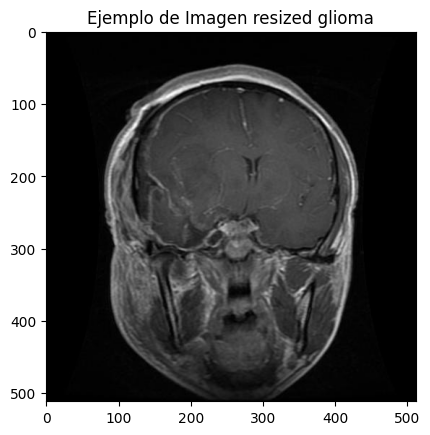

In [ ]:
#Glioma
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_glioma

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized glioma')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


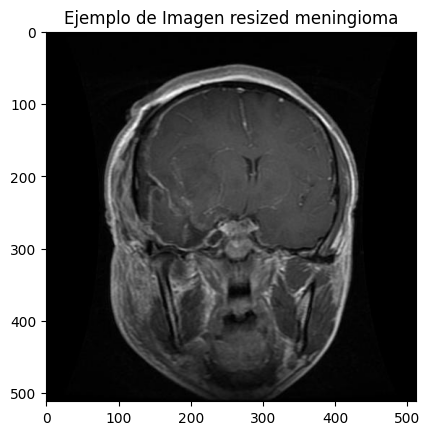

In [ ]:
#Meningioma
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_meningioma

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized meningioma')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


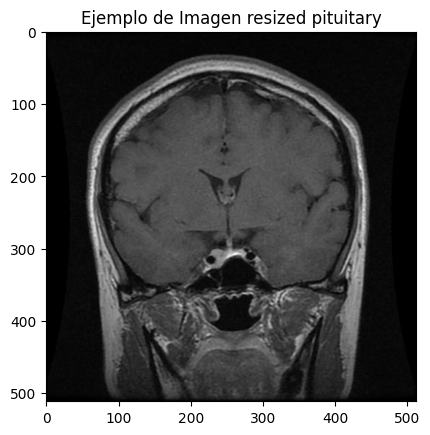

In [ ]:
#pituitary
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_pituitary

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized pituitary')
plt.show()

Ancho de la imagen: 512 píxeles
Alto de la imagen: 512 píxeles


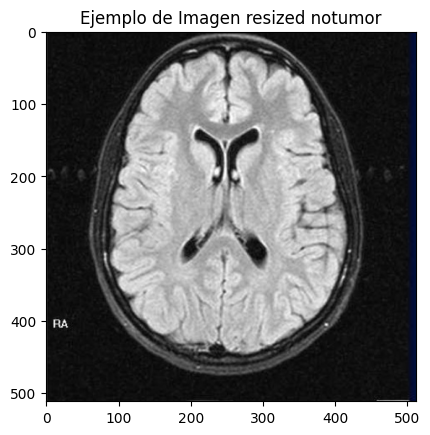

In [ ]:
#notumor
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = Resized_training_notumor

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]

# Obtener las dimensiones de la imagen (alto y ancho)
alto, ancho = imagen_ejemplo.shape[:2]

# Imprimir las dimensiones
print(f"Ancho de la imagen: {ancho} píxeles")
print(f"Alto de la imagen: {alto} píxeles")

# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen resized notumor')
plt.show()

## ***Mejora de contraste***

Se van a usar las imágenes de las carpetas "resized"

Se crea una nueva carpeta para guardar las imágenes con el contraste modificado

In [ ]:
nombre_directorio = "tumores_cerebrales_contrast_resized"
os.mkdir(nombre_directorio)
os.makedirs(os.path.join(nombre_directorio, "Training"))
os.makedirs(os.path.join(nombre_directorio, "Testing"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Training" , "notumor"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "glioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "meningioma"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "pituitary"))
os.makedirs(os.path.join(nombre_directorio + "/Testing" , "notumor"))

In [ ]:
Contraste_training_glioma = '/content/tumores_cerebrales_contrast_resized/Training/glioma'
Contraste_training_meningioma = '/content/tumores_cerebrales_contrast_resized/Training/meningioma'
Contraste_training_pituitary = '/content/tumores_cerebrales_contrast_resized/Training/pituitary'
Contraste_training_notumor = '/content/tumores_cerebrales_contrast_resized/Training/notumor'

In [ ]:
input_directory_cont_glioma = Resized_training_glioma
output_directory_cont_glioma = Contraste_training_glioma

input_directory_cont_meningioma = Resized_training_meningioma
output_directory_cont_meningioma = Contraste_training_meningioma

input_directory_cont_pituitary = Resized_training_pituitary
output_directory_cont_pituitary = Contraste_training_pituitary

input_directory_cont_notumor = Resized_training_notumor
output_directory_cont_notumor = Contraste_training_notumor

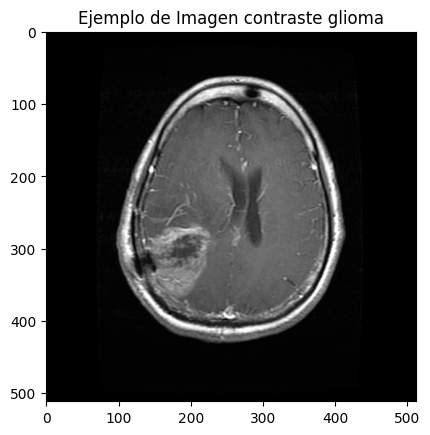

In [ ]:
carpeta_img_rz_cont = Resized_training_glioma
carpeta_destino = Contraste_training_glioma

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    # Aplica el ajuste de contraste aquí, por ejemplo:
    alpha = 1.5  # Factor de contraste (ajusta según tus necesidades)
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste glioma')
plt.show()

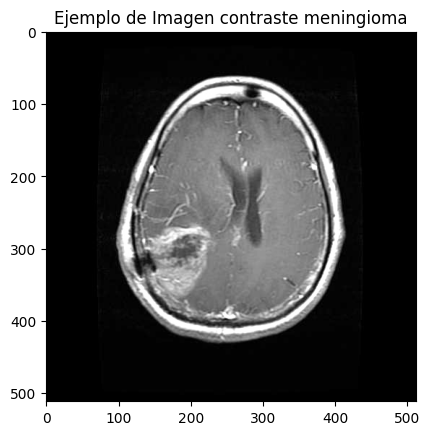

In [ ]:
carpeta_img_rz_cont = Resized_training_meningioma
carpeta_destino = Contraste_training_meningioma

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    # Aplica el ajuste de contraste aquí, por ejemplo:
    alpha =  2 # Factor de contraste (ajusta según tus necesidades)
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste meningioma')
plt.show()

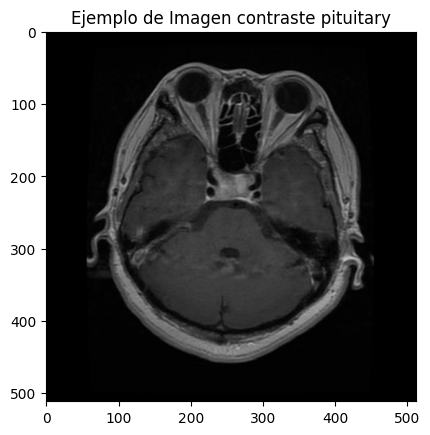

In [ ]:
carpeta_img_rz_cont = Resized_training_pituitary
carpeta_destino = Contraste_training_pituitary

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    # Aplica el ajuste de contraste aquí, por ejemplo:
    alpha = 0.8  # Factor de contraste (ajusta según tus necesidades)
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste pituitary')
plt.show()


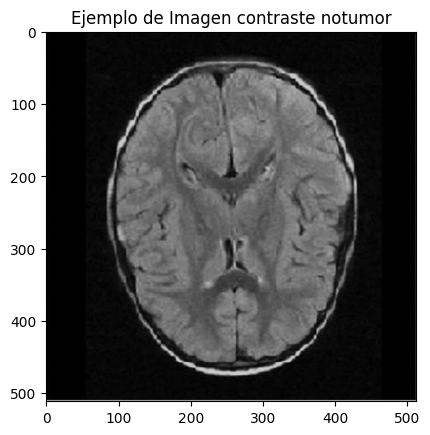

In [ ]:
carpeta_img_rz_cont = Resized_training_notumor
carpeta_destino = Contraste_training_notumor

for imagen_nombre in os.listdir(carpeta_img_rz_cont):
    imagen_path = os.path.join(carpeta_img_rz_cont, imagen_nombre)
    imagen = cv2.imread(imagen_path)

    # Aplica el ajuste de contraste aquí, por ejemplo:
    alpha = 0.8  # Factor de contraste (ajusta según tus necesidades)
    nueva_imagen = cv2.convertScaleAbs(imagen, alpha=alpha, beta=0)

    # Guarda la nueva imagen en la carpeta de destino
    cv2.imwrite(os.path.join(carpeta_destino, 'nueva_' + imagen_nombre), nueva_imagen)

#toca pasarlo a numpy
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = carpeta_destino

# Lista para almacenar las matrices de imagen
matrices_imagenes = []

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_imagenes)

# Iterar a través de los archivos en la carpeta
for archivo in archivos_en_carpeta:
    # Combinar la ruta completa del archivo
    ruta_completa = os.path.join(carpeta_imagenes, archivo)

    # Verificar si el archivo es una imagen (puedes agregar más extensiones según tus necesidades)
    if ruta_completa.endswith((".jpg")):
        # Cargar la imagen usando Pillow
        imagen = Image.open(ruta_completa)

        # Convertir la imagen en una matriz NumPy
        matriz_imagen = np.array(imagen)

        # Agregar la matriz de imagen a la lista
        matrices_imagenes.append(matriz_imagen)


imagen_ejemplo = matrices_imagenes[6]
# Muestra la imagen usando plt.imshow()
plt.imshow(imagen_ejemplo)
plt.title('Ejemplo de Imagen contraste notumor')
plt.show()


## ***Filtrado***

### Filtrado direccional

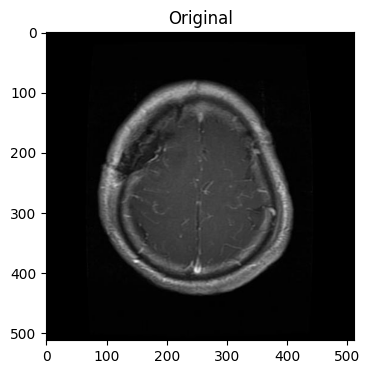

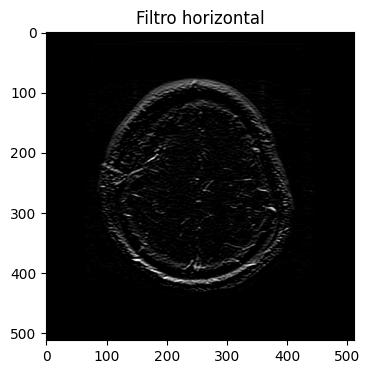

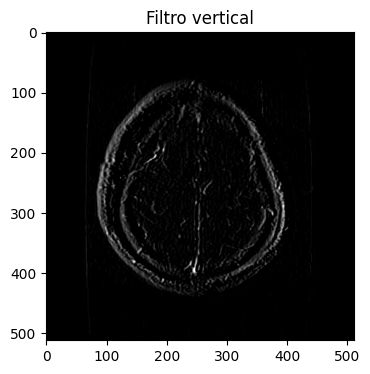

In [ ]:
from google.colab.patches import cv2_imshow

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Definir el kernel del filtro direccional
# Puedes elegir diferentes kernels según la dirección que desees resaltar
kernel_horizontal = np.array([[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]])

kernel_vertical = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

# Aplicar el filtro direccional utilizando la función cv2.filter2D
imagen_filtrada_horizontal = cv2.filter2D(imagen, -1, kernel_horizontal)
imagen_filtrada_vertical = cv2.filter2D(imagen, -1, kernel_vertical)

# Mostrar las imágenes filtradas
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_filtrada_horizontal)
plt.title('Filtro horizontal')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_filtrada_vertical)
plt.title('Filtro vertical')

# Esperar hasta que se presione una tecla y luego cerrar las ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()

### Filtrado Medio

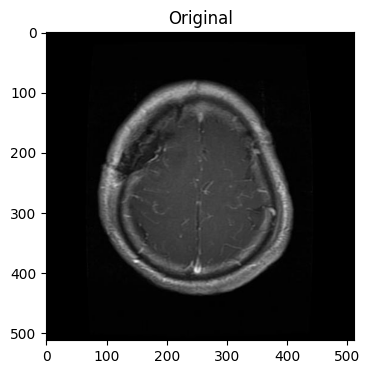

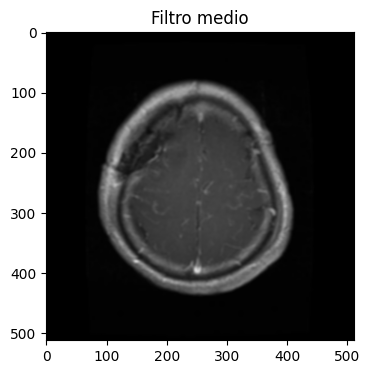

In [ ]:
import cv2
import numpy as np

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Aplicar un kernel de tamaño 5x5 para el filtrado medio
kernel_size = 5
imagen_filtrada = cv2.blur(imagen, (kernel_size, kernel_size))

# Mostrar las imágenes filtradas
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_filtrada)
plt.title('Filtro medio')

# Esperar hasta que se presione una tecla y luego cerrar las ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()


### Filtrado Fourier (Pasa-bajo y pasa-alto)

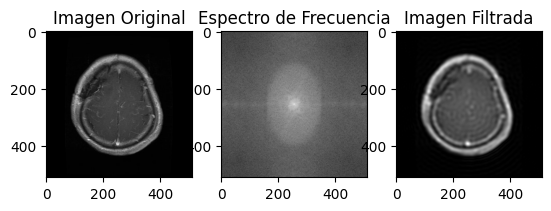

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg', 0)

# Calcular la transformada de Fourier 2D
f_transformada = np.fft.fft2(imagen)

# Desplazar la frecuencia cero al centro
f_transformada_desplazada = np.fft.fftshift(f_transformada)

# Calcular la magnitud del espectro de frecuencia
magnitud_espectro = np.log(np.abs(f_transformada_desplazada) + 1)

# Crear un filtro pasa-bajas en el dominio de la frecuencia
filas, columnas = imagen.shape
centro_fila, centro_columna = filas // 2, columnas // 2
radio_corte = 30  # Puedes ajustar este valor para cambiar la cantidad de detalle preservado
filtro = np.zeros((filas, columnas), np.uint8)
cv2.circle(filtro, (centro_columna, centro_fila), radio_corte, 1, -1)

# Aplicar el filtro en el dominio de la frecuencia
f_transformada_filtrada = f_transformada_desplazada * filtro

# Deshacer el desplazamiento de la frecuencia cero
f_transformada_final = np.fft.ifftshift(f_transformada_filtrada)

# Calcular la inversa de la transformada de Fourier
imagen_filtrada = np.fft.ifft2(f_transformada_final)
imagen_filtrada = np.abs(imagen_filtrada).astype(np.uint8)

# Mostrar la imagen original y la imagen filtrada
plt.subplot(131), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(magnitud_espectro, cmap='gray'), plt.title('Espectro de Frecuencia')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Imagen Filtrada')

plt.show()


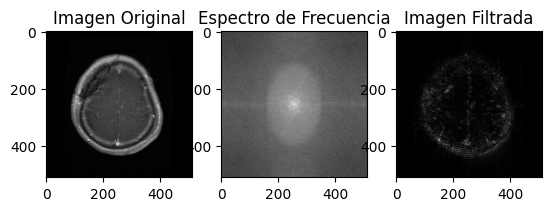

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg', 0)

# Calcular la transformada de Fourier 2D
f_transformada = np.fft.fft2(imagen)

# Desplazar la frecuencia cero al centro
f_transformada_desplazada = np.fft.fftshift(f_transformada)

# Calcular la magnitud del espectro de frecuencia
magnitud_espectro = np.log(np.abs(f_transformada_desplazada) + 1)

# Crear un filtro pasa-alto en el dominio de la frecuencia
filas, columnas = imagen.shape
centro_fila, centro_columna = filas // 2, columnas // 2
radio_corte = 30  # Puedes ajustar este valor para cambiar la cantidad de detalles resaltados
filtro = np.ones((filas, columnas), np.uint8)
cv2.circle(filtro, (centro_columna, centro_fila), radio_corte, 0, -1)

# Aplicar el filtro en el dominio de la frecuencia
f_transformada_filtrada = f_transformada_desplazada * filtro

# Deshacer el desplazamiento de la frecuencia cero
f_transformada_final = np.fft.ifftshift(f_transformada_filtrada)

# Calcular la inversa de la transformada de Fourier
imagen_filtrada = np.fft.ifft2(f_transformada_final)
imagen_filtrada = np.abs(imagen_filtrada).astype(np.uint8)

# Mostrar la imagen original y la imagen filtrada
plt.subplot(131), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(magnitud_espectro, cmap='gray'), plt.title('Espectro de Frecuencia')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Imagen Filtrada')

plt.show()


### Filtro Derivativo

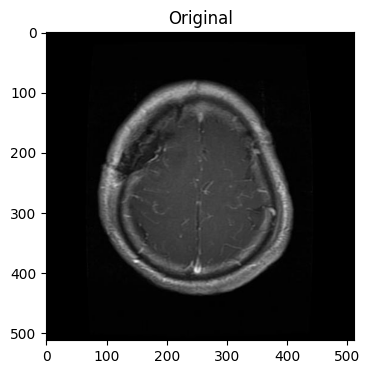

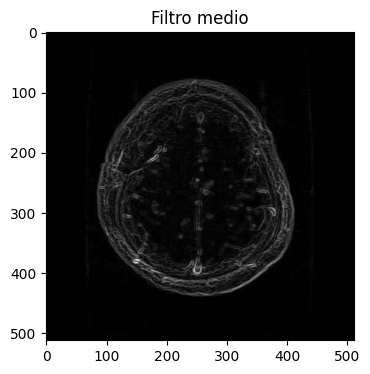

In [ ]:
import cv2
import numpy as np

# Cargar la imagen en escala de grises
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Aplicar el operador de Sobel en las direcciones horizontal y vertical
derivada_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
derivada_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)

# Calcular la magnitud de la derivada
magnitud_derivada = np.sqrt(derivada_x**2 + derivada_y**2)

# Normalizar la magnitud para mostrarla correctamente
magnitud_derivada = cv2.normalize(magnitud_derivada, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Mostrar las imágenes filtradas
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(magnitud_derivada)
plt.title('Filtro medio')

# Esperar hasta que se presione una tecla y luego cerrar las ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()


## ***Transformaciones de color***

### Negativo de imagen

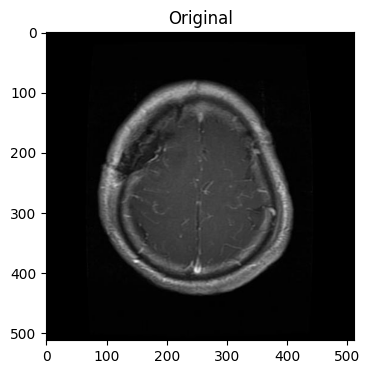

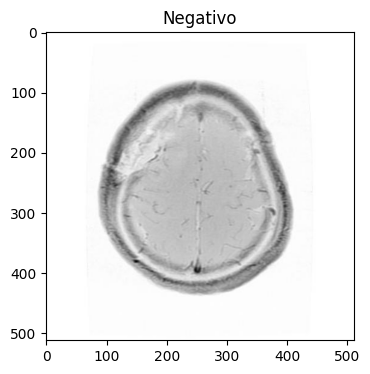

In [ ]:
import cv2

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Obtener el negativo de la imagen
imagen_negativa = cv2.bitwise_not(imagen)

# Mostrar las imágenes filtradas
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_negativa)
plt.title('Negativo')

cv2.waitKey(0)
cv2.destroyAllWindows()


### Correccion Gamma

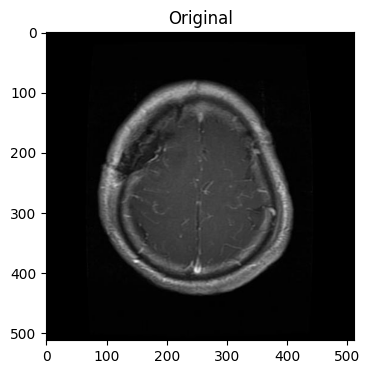

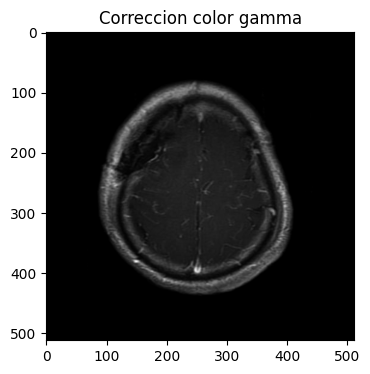

In [ ]:
import cv2
import numpy as np

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Aplicar corrección gamma
gamma = 1.5
imagen_corregida_gamma = np.power(imagen / 255.0, gamma) * 255.0
imagen_corregida_gamma = imagen_corregida_gamma.astype(np.uint8)

# Mostrar la imagen original y la imagen corregida gamma
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_corregida_gamma)
plt.title('Correccion color gamma')

cv2.waitKey(0)
cv2.destroyAllWindows()


### Equalización del histograma

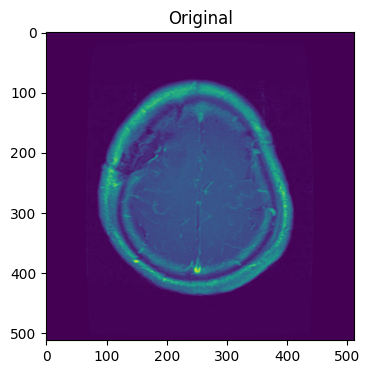

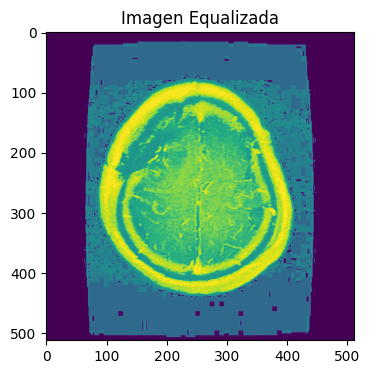

In [ ]:
import cv2

# Cargar la imagen en escala de grises
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg', cv2.IMREAD_GRAYSCALE)

# Equalizar el histograma
imagen_equalizada = cv2.equalizeHist(imagen)

# Mostrar la imagen original y la imagen equalizada
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_equalizada)
plt.title('Imagen Equalizada')

cv2.waitKey(0)
cv2.destroyAllWindows()


### Balance de Color

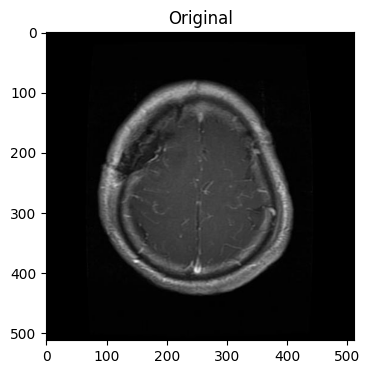

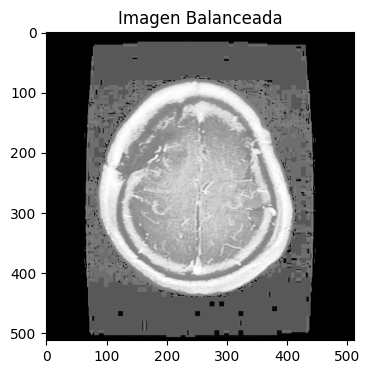

In [ ]:
import cv2
import numpy as np

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Aplicar corrección de color (balance de color)
azul, verde, rojo = cv2.split(imagen)
azul_equilibrado = cv2.equalizeHist(azul)
verde_equilibrado = cv2.equalizeHist(verde)
rojo_equilibrado = cv2.equalizeHist(rojo)
imagen_balanceada = cv2.merge((azul_equilibrado, verde_equilibrado, rojo_equilibrado))

# Mostrar la imagen original y la imagen con balance de color
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_balanceada)
plt.title('Imagen Balanceada')

cv2.waitKey(0)
cv2.destroyAllWindows()


### Transformacion de espacio de color

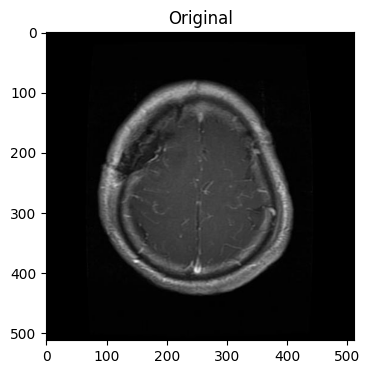

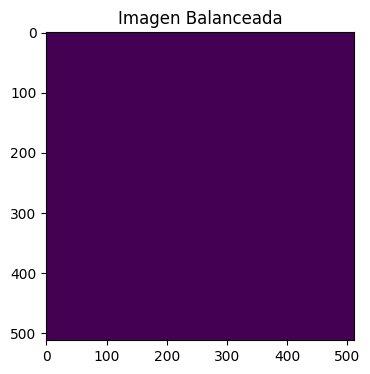

In [ ]:
import cv2

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Convertir de BGR a HSV
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Extraer el canal de tono (Hue)
canal_tono = imagen_hsv[:, :, 0]

# Mostrar la imagen original y el canal de tono
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(canal_tono)
plt.title('Imagen Balanceada')

cv2.waitKey(0)
cv2.destroyAllWindows()


### Binarizacion del color

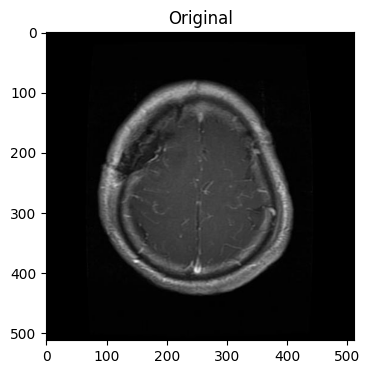

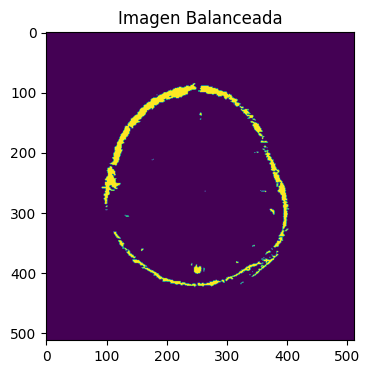

In [ ]:
import cv2

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

# Establecer un umbral para la binarización
umbral = 128

# Aplicar binarización
_, imagen_binaria = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)

# Mostrar la imagen original y la imagen binaria
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_binaria)
plt.title('Imagen Balanceada')

cv2.waitKey(0)
cv2.destroyAllWindows()


### Sepia

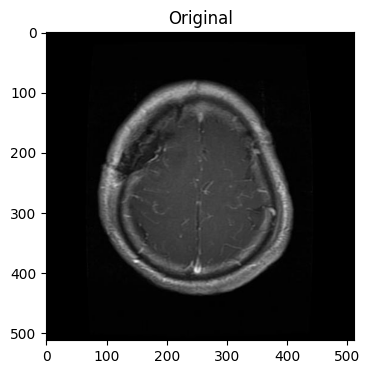

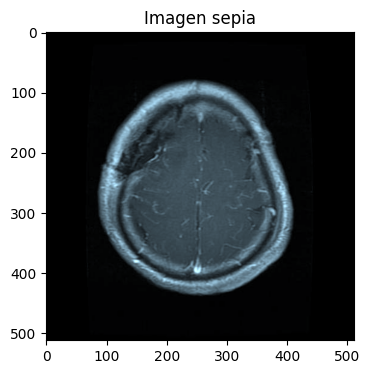

In [ ]:
import cv2
import numpy as np

# Cargar la imagen
imagen = cv2.imread('/content/tumores_cerebrales/Imágenes Cerebrales/Training/glioma/Tr-gl_0158.jpg')

# Definir una matriz de tonos sepia
filtro_sepia = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])

# Aplicar el filtro de tonos sepia
imagen_sepia = cv2.transform(imagen, filtro_sepia)

# Mostrar la imagen original y la imagen en tonos sepia
plt.figure(figsize=(8, 4))
plt.imshow(imagen)
plt.title('Original')

plt.figure(figsize=(8, 4))
plt.imshow(imagen_sepia)
plt.title('Imagen sepia')

cv2.waitKey(0)
cv2.destroyAllWindows()
